In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [5]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
def missing_func(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  df_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
  return df_missing 

In [7]:
train_missing = missing_func(train)
test_missing = missing_func(test)

In [8]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


In [9]:
train["adv_flag"] = 0
test["adv_flag"] = 1

df = pd.concat([train,test]).reset_index(drop=True)

In [10]:
train_missing_50 = train_missing[train_missing.percent<0.5].index
test_missing_50 =  test_missing[test_missing.percent<0.5].index

categorical_features = train.dtypes[train.dtypes=="object"].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [11]:
display(df[features])

,MED_Alteration_2006,MAX_CTVI_2016,MED_Green_2012,MED_Fe3_2002,MAX_SWIR1_2004,MAX_PSNDc2_2002,MAX_AVI_2005,MIN_DSWI_5_2019,MED_DSWI_5_2013,MAX_Ferrous_Silicates_2015,...,MED_DSWI_2018,MAX_RDVI_2004,MED_Blue_2017,MED_MCARI1_2018,MAX_D678_500_2020,MAX_NLI_2006,MED_Cirededge_2020,MED_mCRIG_2008,MAX_Gossan_2014,MAX_Fe3_2005
0,3.799555,0.484770,24.466267,NaN,3.201008,NaN,-15.240041,-1.751877,-1.178914,0.247929,...,2.321284,-1.962049,65.169533,11.151742,-37.845995,0.992658,-0.607550,-0.069878,0.114140,0.614153
1,5.289384,0.635513,NaN,NaN,NaN,NaN,-43.178467,-0.375790,-0.959715,0.268718,...,2.516006,NaN,67.550980,58.087377,-21.261650,0.936073,0.123184,-0.215958,0.037703,0.553688
2,4.137365,0.642171,121.168320,0.485453,14.904108,-0.772302,-23.860977,-1.180877,-1.640010,0.274035,...,1.902462,-1.445508,61.978100,8.141840,-35.461501,0.880823,-0.693658,-0.053450,0.068855,0.832155
3,NaN,0.323518,NaN,NaN,NaN,NaN,NaN,-3.081777,-2.059462,0.250801,...,2.414773,NaN,65.034882,27.633571,-42.597220,NaN,-0.654994,NaN,0.072561,NaN
4,4.383241,0.642958,NaN,NaN,NaN,NaN,NaN,-3.663749,-2.304678,0.216011,...,2.486905,NaN,66.526955,20.015391,-57.115155,0.673919,-0.618370,NaN,0.069867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18174,3.866181,0.609419,28.880741,NaN,NaN,NaN,-29.011959,-1.904021,-1.759297,0.281460,...,2.086299,NaN,64.961662,12.234872,-38.426224,0.614195,-0.719932,-0.032921,0.059106,0.790178
18175,4.915057,0.541643,NaN,0.513824,1.019269,-0.702223,-28.283072,-2.055911,-1.073568,0.226883,...,2.412294,-1.715096,58.926044,14.545303,-40.333220,0.682088,-0.511018,-0.068733,0.161479,0.528031
18176,3.835005,0.637070,46.416428,NaN,0.460475,NaN,-36.458487,-1.340463,-0.840649,0.214972,...,1.842667,-3.240194,67.043037,10.665759,-29.573093,0.954606,-0.755730,-0.086269,0.041378,0.700593
18177,5.128952,0.656554,31.773935,0.566654,3.056220,0.047454,-19.270018,-1.807843,-1.045533,0.340011,...,2.398418,-1.420959,68.544746,13.791866,-34.901621,0.936924,-0.400299,-0.094157,0.122598,0.818117


In [12]:
tr_mesh = train.mesh20.value_counts().index
te_mesh = test.mesh20.value_counts().index

test_only_mesh = list(set(te_mesh)-set(tr_mesh))
test_mesh = list(set(te_mesh)-set(test_only_mesh))

## Model

In [13]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold, KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score

In [15]:
class CFG:
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols="adv_flag"
  boosting_type="gbdt"
  fold_target="adv_flag"

In [16]:
# =========================================================================================
# CV split
# =========================================================================================
def get_fold(df,fold_target, isFlag=False):
  if isFlag:
    Fold = StratifiedKFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
    for n, (train_index, val_index) in enumerate(Fold.split(df, df[fold_target])):
        df.loc[val_index, 'fold'] = int(n)
  else:
    Fold = KFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
    for n, (train_index, val_index) in enumerate(Fold.split(df)):
      df.loc[val_index, 'fold'] = int(n)
  df['fold'] = df['fold'].astype(int)
  display(df.groupby('fold').size())
  return df

In [17]:
def get_score(labels, preds, isFlag=False):
  if isFlag:
    f1score = f1_score(labels, preds)
    pscore = precision_score(labels, preds)
    rscore =recall_score(labels, preds)
    print(f"F1 Score : {f1score}")
    print(f"Precision Score : {pscore}")
    print(f"Recall Score {rscore}")
  else:
    rmse = np.sqrt(mean_squared_error(labels, preds))
    print(f"RMSE {rmse}")

In [18]:
features = list(features)
features.remove('id')

In [19]:
params1 = {
        'objective': "binary",
        'metric': 'binary_logloss',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.5,
        "n_estimators":1000
    }

params2 = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.5,
        "n_estimators":1000
    }

In [26]:
def get_pred(df, fold_target, target_cols, model, isFlag=False):
  if isFlag:
    pred_name = "flag"
    train = get_fold(df, fold_target, isFlag=True)
  else:
    pred_name = ""
    train = get_fold(df, fold_target, isFlag=False)
  oof_df = pd.DataFrame()
  df_importance = pd.DataFrame({'feature': features})
  df_importance['importance'] = 0

  for fold in range(CFG.n_folds):
    if fold in CFG.trn_fold:
      print("="*15,f" FOLD : {fold} ","="*15)
      train_folds = train[train['fold'] != fold]
      valid_folds = train[train['fold'] == fold]

      train_X = train_folds[features].values
      valid_X = valid_folds[features].values
      train_labels = train_folds[target_cols].values
      valid_labels = valid_folds[target_cols].values

      clf = model
      #model = lgb.LGBMRegressor(**params)
      clf.fit(train_X, train_labels,
              eval_set=[(valid_X, valid_labels)],
              #eval_metric="rmse",
              verbose = 200,
              early_stopping_rounds=50)
      
      pred = model.predict_proba(valid_X)
      valid_folds[f"{pred_name}_pred"] = pred[:,1]
      valid_folds[f"{pred_name}_pred_flag"] = (valid_folds[f"{pred_name}_pred"]>.5).astype(int)
      oof_df = pd.concat([oof_df, valid_folds])

      f_importance = np.array(model.feature_importances_)
      temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
      df_importance['importance'] += temp_importance['importance']

      get_score(valid_labels, valid_folds[f"{pred_name}_pred_flag"], isFlag)

  df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
  df_importance = df_importance.sort_values('importance', ascending=False)
  display(df_importance.head(35))
  fig = plt.figure(figsize=(16, 32), tight_layout=True)
  sns.barplot(x="importance", y="feature", data=df_importance.head(35))
  plt.title("LightGBM feature importances")
  get_score(oof_df[target_cols], oof_df[f"{pred_name}_pred_flag"], isFlag)
  return oof_df

fold
0    4545
1    4545
2    4545
3    4544
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.0124235
Early stopping, best iteration is:
[169]	valid_0's binary_logloss: 0.0124


<ipython-input-26-edaf66c22f43>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = pred[:,1]
<ipython-input-26-edaf66c22f43>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred_flag"] = (valid_folds[f"{pred_name}_pred"]>.5).astype(int)


F1 Score : 0.9855936413313463
Precision Score : 0.9890329012961117
Recall Score 0.9821782178217822
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.0103064
Early stopping, best iteration is:
[176]	valid_0's binary_logloss: 0.0102952


<ipython-input-26-edaf66c22f43>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = pred[:,1]
<ipython-input-26-edaf66c22f43>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred_flag"] = (valid_folds[f"{pred_name}_pred"]>.5).astype(int)


F1 Score : 0.9920792079207921
Precision Score : 0.9920792079207921
Recall Score 0.9920792079207921
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.00954321
Early stopping, best iteration is:
[167]	valid_0's binary_logloss: 0.00950307


<ipython-input-26-edaf66c22f43>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = pred[:,1]
<ipython-input-26-edaf66c22f43>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred_flag"] = (valid_folds[f"{pred_name}_pred"]>.5).astype(int)


F1 Score : 0.9945463559742191
Precision Score : 0.9960278053624627
Recall Score 0.9930693069306931
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.0157008
Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.0156551


<ipython-input-26-edaf66c22f43>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = pred[:,1]
<ipython-input-26-edaf66c22f43>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred_flag"] = (valid_folds[f"{pred_name}_pred"]>.5).astype(int)


F1 Score : 0.9875187219171244
Precision Score : 0.9949698189134809
Recall Score 0.9801783944499505


,feature,importance
1631,sst_ymd,0.030861
2021,Salinity_annual,0.028487
718,river_area,0.027893
3135,sst_diff,0.027448
2241,year,0.027003
1932,hist_warm_sst,0.024135
2551,lat,0.023838
182,river_dist,0.021662
1793,lon,0.019881
2493,month,0.018843


F1 Score : 0.9899416366571464
Precision Score : 0.9930244145490782
Recall Score 0.9868779400841793


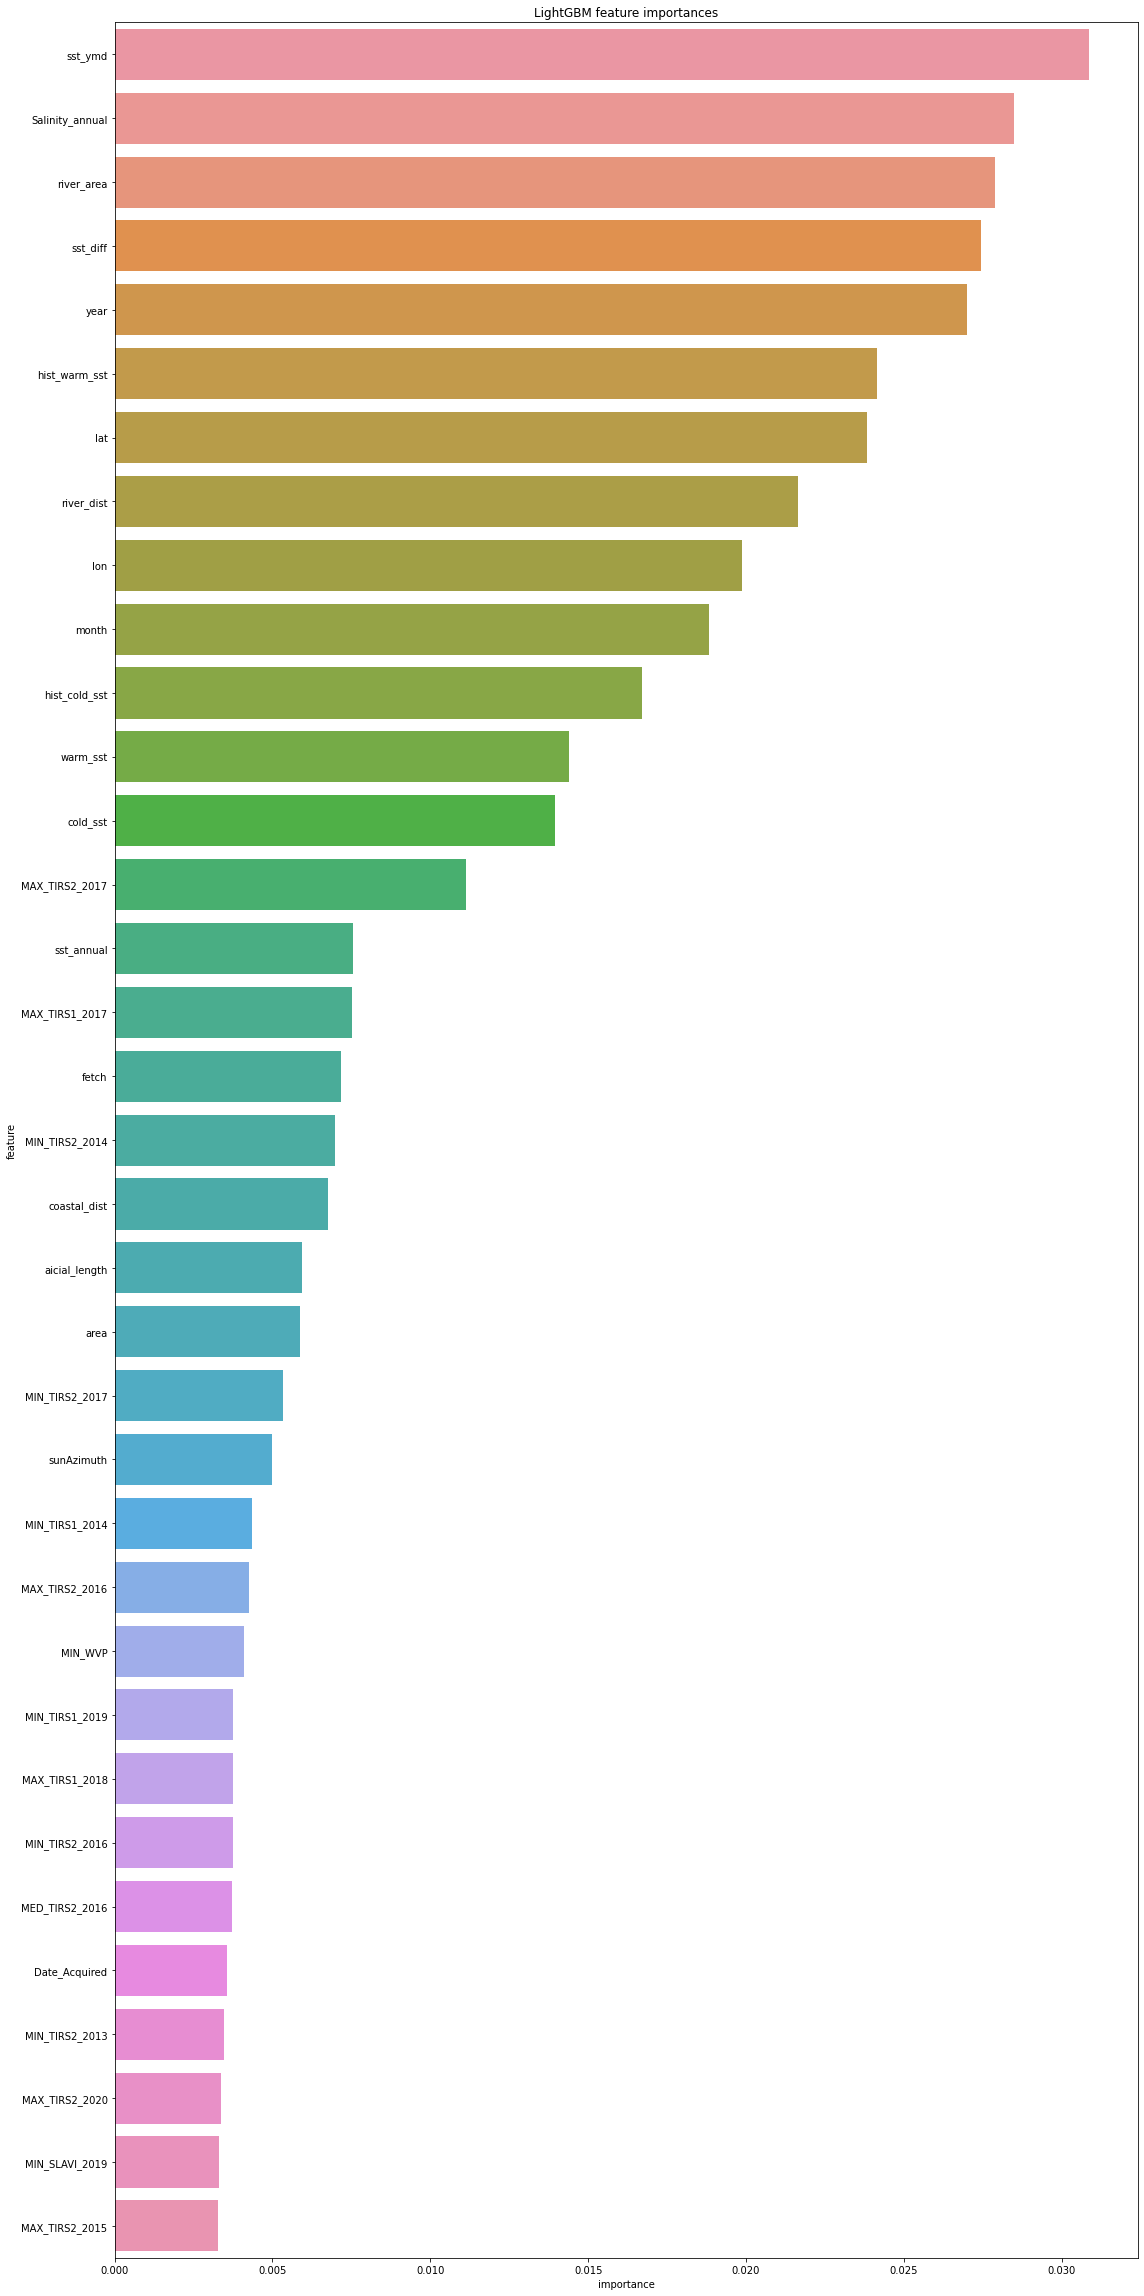

In [27]:
model1 = lgb.LGBMClassifier(**params1)
flag_oof = get_pred(df, CFG.fold_target, CFG.target_cols, model1, isFlag=True)

In [29]:
#flag_oof["flag_state"] = (flag_oof["flag_pred"]>.8).astype(int)
#flag_oof.flag_pred.value_counts()

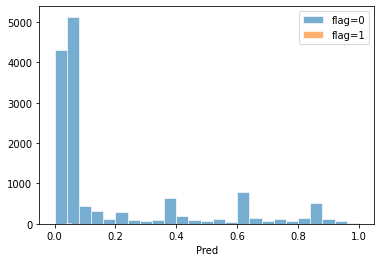

In [33]:
flag_oof_train = flag_oof.loc[flag_oof.adv_flag==0]
plt.hist(flag_oof_train.loc[flag_oof_train.flag_pred_flag==0]["cover"], label='flag=0', bins=25, edgecolor='white', alpha=.6)
plt.hist(flag_oof_train.loc[flag_oof_train.flag_pred_flag==1]["cover"], label='flag=1', bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

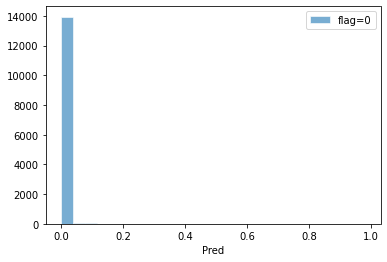

In [34]:
plt.hist(flag_oof_train["flag_pred"], label='flag=0', bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [41]:
flag_oof_train.sort_values("flag_pred", ascending=False, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [46]:
flag_oof_train[:len(test)]

,id,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20,adv_flag,fold,flag_pred,flag_pred_flag
3101,3101,24.533778,124.249333,20.00,20100717,2010.0,7.0,0.050,NaN,0.000000,...,-2.484492,2.170814,87.034697,2.756482,-34.123525,3624_30,0,1,0.980675,1
7640,7640,26.208417,127.249143,20.00,20100612,2010.0,6.0,0.050,NaN,18.274681,...,-2.457430,-63.062876,108.807806,1.302564,-1.108967,3927_10,0,2,0.878367,1
12477,12477,24.332889,124.072694,20.00,20100811,2010.0,8.0,0.050,NaN,0.000000,...,-5.234008,2.878742,233.120325,2.679965,0.804687,3624_10,0,3,0.843429,1
12700,12700,24.051778,123.748389,20.00,20110414,2011.0,4.0,0.050,NaN,0.000000,...,-2.851536,2.295616,63.837893,2.607687,-189.548108,3623_02,0,1,0.838521,1
8229,8229,26.372917,128.000250,20.00,20091212,2009.0,12.0,0.025,NaN,0.000000,...,-2.414947,2.088644,469.967450,2.989194,0.454888,3928_20,0,1,0.831917,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,5612,24.830972,125.405306,20.00,20111014,2011.0,10.0,0.050,NaN,0.000000,...,-2.288880,2.242980,33.629102,2.656307,-5.670339,3725_01,0,0,0.000470,0
6629,6629,24.400363,124.130980,20.00,NaN,2019.0,10.0,0.625,1.1,0.000000,...,-3.113486,2.649445,58.161873,3.300890,-2.556941,3624_20,0,2,0.000470,0
12874,12874,26.164000,127.630583,20.00,20091128,2009.0,11.0,0.025,NaN,0.000000,...,-2.542020,-1.620096,40.701579,1.281752,-3.005423,3927_02,0,2,0.000470,0
1777,1777,26.341375,127.907658,20.00,NaN,2019.0,8.0,0.000,5.3,0.000000,...,-2.694296,2.330958,46.606413,4.157274,-6.650733,3927_23,0,3,0.000470,0


In [47]:
a = ["あい","あか","あさ","あお"]
b = ["あい","あか"]
tf = any(word in a for word in b)
print(tf)

True


In [50]:
import re
c = ','.join(a)
d = re.sub(c, b)
d

TypeError: ignored